## Problem Statement:
### Pick up the following stocks and generate forecasts accordingly
### Stocks:
1. NASDAQ.AAPL
2. NASDAQ.ADP
3. NASDAQ.CBOE
4. NASDAQ.CSCO
5. NASDAQ.EBAY

## 1.NASDAQ.AAPL

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.tools.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_model import ARIMA, ARMAResults
import datetime
import sys
import seaborn as sns
import statsmodels
import statsmodels.stats.diagnostic as diag
from statsmodels.tsa.stattools import adfuller
from scipy.stats.mstats import normaltest
from matplotlib.pyplot import acorr
plt.style.use('fivethirtyeight')
%matplotlib inline
df = pd.read_csv('data_stocks.csv')
df.head()


,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,1491226200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,84.370,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350
1,1491226260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,84.370,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350
2,1491226320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,84.585,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365
3,1491226380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,84.460,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380
4,1491226440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,84.470,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240


In [2]:
df["AAPL_log"]=df["NASDAQ.AAPL"].apply(lambda x:np.log(x) )

In [3]:
df["AAPL_log"].head()

0    4.967589
1    4.967728
2    4.967659
3    4.967310
4    4.967449
Name: AAPL_log, dtype: float64

In [4]:
type(df["DATE"][0])

numpy.int64

In [5]:
import datetime as dt

In [6]:
df["DATE_org"]=df["DATE"].apply(lambda x:dt.datetime.fromtimestamp(x).strftime("%Y-%m-%d %H:%M:%S") )

In [7]:
import statsmodels.api as sm

In [8]:
sm.stats.durbin_watson(df["AAPL_log"])

1.5195875753588083e-08

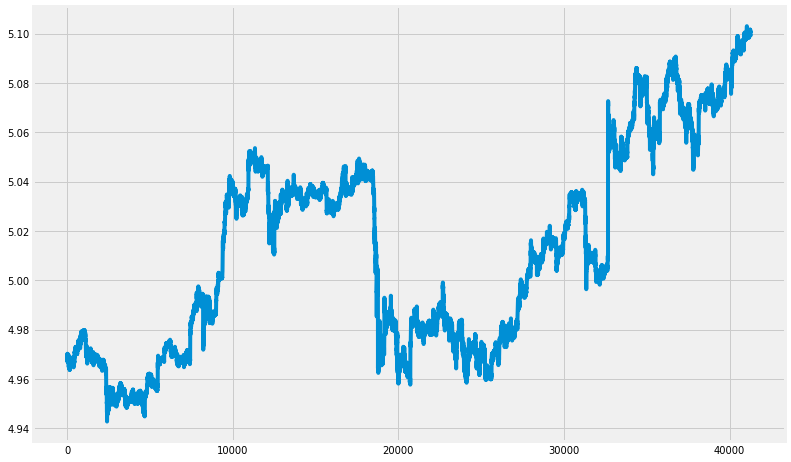

In [9]:
%matplotlib inline
df["AAPL_log"].plot(figsize=(12,8));

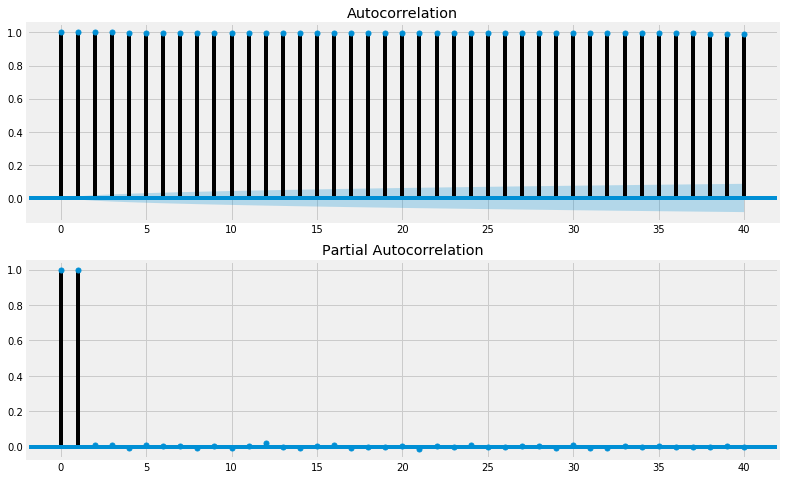

In [10]:
# show plots in the notebook
%matplotlib inline
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df["AAPL_log"].values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df["AAPL_log"], lags=40, ax=ax2)

In [11]:
array = (df["AAPL_log"].dropna().as_matrix())

/home/skull/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [12]:
array

array([4.9675886 , 4.96772779, 4.9676589 , ..., 5.0999274 , 5.09913445,
       5.09974447])

In [13]:
df["difflog_AAPLE"] = df["AAPL_log"]-df["AAPL_log"].shift(periods=-1)

In [14]:
model = sm.tsa.ARMA(array, (2,0)).fit()
print(model.params)

[5.02084548 0.9907376  0.00918442]


In [15]:
print(model.aic, model.bic, model.hqic)

-492715.6402169109 -492681.12904012954 -492704.7324356043


In [16]:
aic=999999
b_p,b_d,b_q=0,0,0
for p in range(3):
    for d in range(1,3):
        for q in range(3):
            try:
                model= ARIMA(array,(p,d,q)).fit()
                if(aic > model.aic):
                    aic= model.aic
                    b_p,b_d,b_q=p,d,q
            except:
                pass
                
print(b_p,b_d,b_q)

/home/skull/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/home/skull/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/home/skull/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/skull/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/skull/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  '

1 1 2


/home/skull/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/home/skull/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [17]:
 model= ARIMA(array,(1,1,2)).fit()

In [18]:
sm.stats.durbin_watson(model.resid)

1.9998239822982171

In [19]:
pred=model.predict()
pred

array([3.20002785e-06, 1.93951592e-06, 1.43027394e-06, ...,
       4.68256114e-06, 8.01149163e-06, 2.32181977e-05])

In [20]:
from sklearn.metrics import mean_squared_error
print(np.sqrt(mean_squared_error(pred,df["difflog_AAPLE"][:-1])))

0.0006184063459858566


## 2.NASDAQ.ADP

In [21]:
df = pd.read_csv('data_stocks.csv')
df.head()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,1491226200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,84.370,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350
1,1491226260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,84.370,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350
2,1491226320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,84.585,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365
3,1491226380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,84.460,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380
4,1491226440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,84.470,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240


In [22]:
df["ADP_log"]=df["NASDAQ.ADP"].apply(lambda x:np.log(x))

In [23]:
df["ADP_log"].head()

0    4.627225
1    4.626344
2    4.627054
3    4.626344
4    4.625561
Name: ADP_log, dtype: float64

In [24]:
type(df["DATE"][0])

numpy.int64

In [25]:
import datetime as dt

In [26]:
df["DATE_org"]=df["DATE"].apply(lambda x:dt.datetime.fromtimestamp(x).strftime("%Y-%m-%d %H:%M:%S") )

In [27]:
import statsmodels.api as sm

In [28]:
sm.stats.durbin_watson(df["ADP_log"])

2.270798861744159e-08

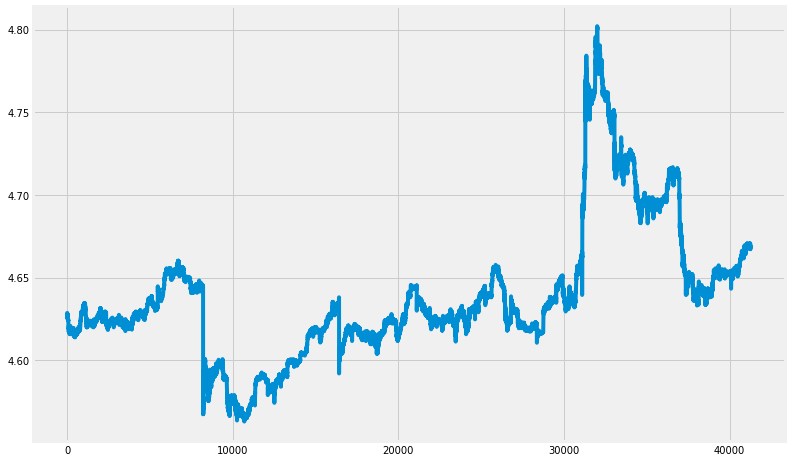

In [29]:
%matplotlib inline
df["ADP_log"].plot(figsize=(12,8));

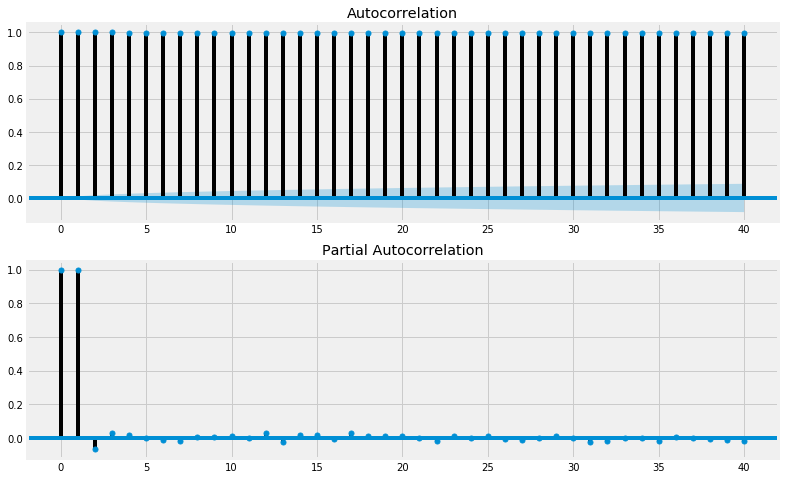

In [30]:
# show plots in the notebook
%matplotlib inline
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df["ADP_log"].values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df["ADP_log"], lags=40, ax=ax2)

In [31]:
array = (df["ADP_log"].dropna().as_matrix())

/home/skull/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [32]:
array

array([4.62722518, 4.62634442, 4.62705398, ..., 4.66833276, 4.66720558,
       4.66786326])

In [33]:
df["difflog_ADP"] = df["ADP_log"]-df["ADP_log"].shift(periods=-1)

In [34]:
model = sm.tsa.ARMA(array, (2,0)).fit()
print(model.params)

[ 4.64047616  1.05961534 -0.05977941]


In [35]:
print(model.aic, model.bic, model.hqic)

-482690.9495338824 -482656.438357101 -482680.0417525758


In [36]:
#finding best parameters for arima model
aic=999999
b_p,b_d,b_q=0,0,0
for p in range(3):
    for d in range(1,3):
        for q in range(3):
            try:
                model= ARIMA(array,(p,d,q)).fit()
                if(aic > model.aic):
                    aic= model.aic
                    b_p,b_d,b_q=p,d,q
            except:
                pass
                
print(b_p,b_d,b_q)

/home/skull/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/skull/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:650: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/home/skull/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:651: RuntimeWarning: invalid value encountered in true_divide
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/home/skull/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/skull/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
 

2 1 2


In [37]:
model= ARIMA(array,(2,1,2)).fit()

In [38]:
sm.stats.durbin_watson(model.resid)

2.0001295576922913

In [39]:
pred=model.predict()
pred

array([ 9.80451665e-07, -5.17153168e-05,  6.71623439e-05, ...,
        2.67707801e-05, -3.27844269e-05, -5.54278476e-05])

In [40]:
from sklearn.metrics import mean_squared_error
print(np.sqrt(mean_squared_error(pred,df["difflog_ADP"][:-1])))

0.000703868796485515


## 3.NASDAQ.CBOE

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.tools.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_model import ARIMA, ARMAResults
import datetime
import sys
import seaborn as sns
import statsmodels
import statsmodels.stats.diagnostic as diag
from statsmodels.tsa.stattools import adfuller
from scipy.stats.mstats import normaltest
from matplotlib.pyplot import acorr
plt.style.use('fivethirtyeight')
%matplotlib inline
df = pd.read_csv('data_stocks.csv')
df.head()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,1491226200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,84.370,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350
1,1491226260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,84.370,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350
2,1491226320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,84.585,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365
3,1491226380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,84.460,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380
4,1491226440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,84.470,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240


In [3]:
df["CBOE_log"]=df["NASDAQ.CBOE"].apply(lambda x:np.log(x) )

In [4]:
df["CBOE_log"].head()

0    4.394819
1    4.397038
2    4.397038
3    4.396053
4    4.395930
Name: CBOE_log, dtype: float64

In [5]:
type(df["DATE"][0])

numpy.int64

In [6]:
import datetime as dt

In [7]:
df["DATE_org"]=df["DATE"].apply(lambda x:dt.datetime.fromtimestamp(x).strftime("%Y-%m-%d %H:%M:%S") )

In [8]:
import statsmodels.api as sm

In [9]:
sm.stats.durbin_watson(df["CBOE_log"])

1.3696573056329881e-08

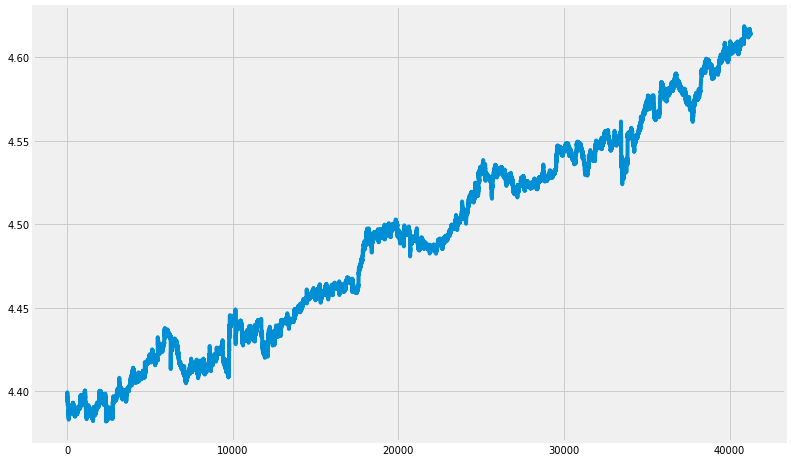

In [10]:
%matplotlib inline
df["CBOE_log"].plot(figsize=(12,8));

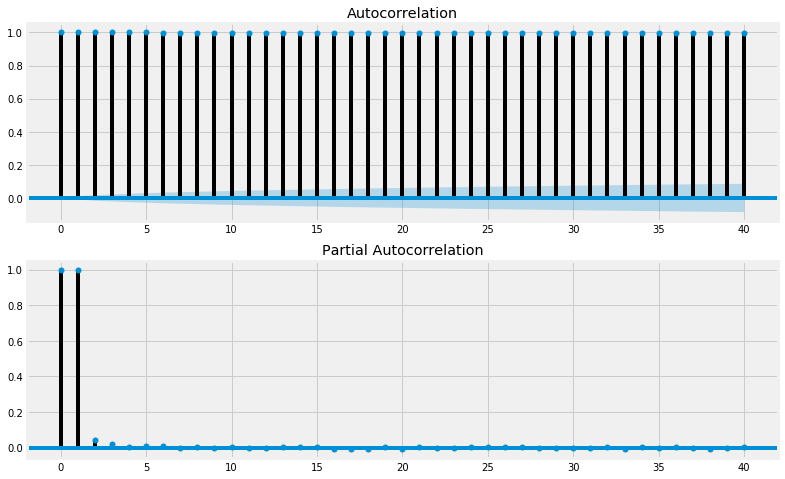

In [11]:
# show plots in the notebook
%matplotlib inline
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df["CBOE_log"].values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df["CBOE_log"], lags=40, ax=ax2)

In [12]:
array = (df["CBOE_log"].dropna().as_matrix())

/home/skull/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [13]:
array

array([4.39481946, 4.39703839, 4.39703839, ..., 4.61373342, 4.61343593,
       4.61403081])

In [14]:
df["difflog_CBOE"] = df["CBOE_log"]-df["CBOE_log"].shift(periods=-1)

In [15]:
model = sm.tsa.ARMA(array, (2,0)).fit()
print(model.params)

[4.50119359 0.92316442 0.0768221 ]


In [16]:
print(model.aic, model.bic, model.hqic)

-506320.7420162536 -506286.2308394722 -506309.834234947


In [17]:
aic=999999
b_p,b_d,b_q=0,0,0
for p in range(3):
    for d in range(1,3):
        for q in range(3):
            try:
                model= ARIMA(array,(p,d,q)).fit()
                if(aic > model.aic):
                    aic= model.aic
                    b_p,b_d,b_q=p,d,q
            except:
                pass
                
print(b_p,b_d,b_q)

/home/skull/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/home/skull/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


1 1 1


In [18]:
 model= ARIMA(array,(1,1,1)).fit()

In [19]:
sm.stats.durbin_watson(model.resid)

2.000140400846158

In [20]:
pred=model.predict()
pred

array([ 5.29882776e-06, -1.65756928e-04, -9.58173326e-05, ...,
        1.38681622e-05,  2.72496408e-05,  4.34296977e-05])

In [21]:
from sklearn.metrics import mean_squared_error
print(np.sqrt(mean_squared_error(pred,df["difflog_CBOE"][:-1])))

0.0005329679467185359


## 4.NASDAQ.CSCO

In [22]:
df = pd.read_csv('data_stocks.csv')
df.head()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,1491226200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,84.370,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350
1,1491226260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,84.370,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350
2,1491226320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,84.585,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365
3,1491226380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,84.460,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380
4,1491226440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,84.470,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240


In [23]:
df["CSCO_log"]=df["NASDAQ.CSCO"].apply(lambda x:np.log(x) )

In [24]:
df["CSCO_log"].head()

0    3.518684
1    3.522825
2    3.523415
3    3.521936
4    3.521644
Name: CSCO_log, dtype: float64

In [25]:
type(df["DATE"][0])

numpy.int64

In [26]:
import datetime as dt

In [27]:
df["DATE_org"]=df["DATE"].apply(lambda x:dt.datetime.fromtimestamp(x).strftime("%Y-%m-%d %H:%M:%S") )

In [28]:
import statsmodels.api as sm

In [29]:
sm.stats.durbin_watson(df["CSCO_log"])

3.6547693893127265e-08

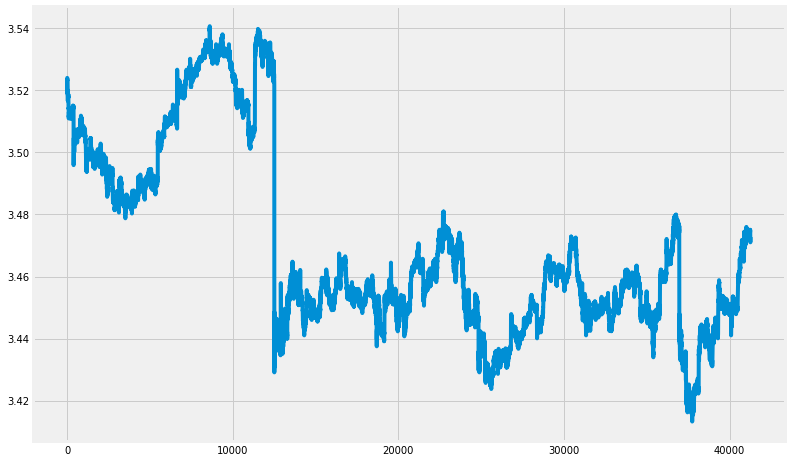

In [30]:
%matplotlib inline
df["CSCO_log"].plot(figsize=(12,8));

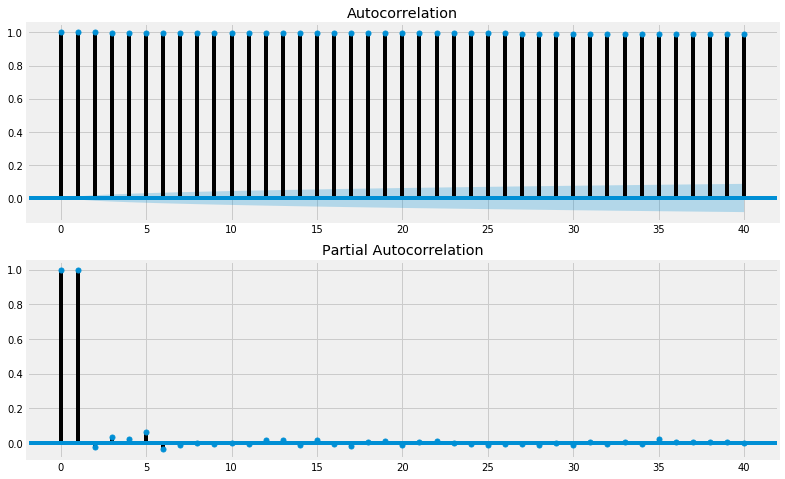

In [31]:
# show plots in the notebook
%matplotlib inline
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df["CSCO_log"].values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df["CSCO_log"], lags=40, ax=ax2)

In [32]:
array = (df["CSCO_log"].dropna().as_matrix())

/home/skull/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [33]:
array

array([3.51868408, 3.52282487, 3.52341501, ..., 3.47196645, 3.47181116,
       3.47274255])

In [34]:
df["difflog_CSCO"] = df["CSCO_log"]-df["CSCO_log"].shift(periods=-1)

In [35]:
model = sm.tsa.ARMA(array, (2,0)).fit()
print(model.params)

[ 3.47397838  1.01601727 -0.0162545 ]


In [36]:
print(model.aic, model.bic, model.hqic)

-486880.2585554792 -486845.7473786978 -486869.3507741726


In [37]:
#serching for best parameters
aic=999999
b_p,b_d,b_q=0,0,0
for p in range(3):
    for d in range(1,3):
        for q in range(3):
            try:
                model= ARIMA(array,(p,d,q)).fit()
                if(aic > model.aic):
                    aic= model.aic
                    b_p,b_d,b_q=p,d,q
            except:
                pass
                
print(b_p,b_d,b_q)

/home/skull/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/home/skull/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/home/skull/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/home/skull/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


2 1 2


In [38]:
 model= ARIMA(array,(2,1,2)).fit()

/home/skull/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


In [39]:
sm.stats.durbin_watson(model.resid)

1.9996882395865665

In [40]:
pred=model.predict()
pred

array([-1.11934238e-06,  6.46078514e-05, -1.47543665e-04, ...,
       -1.00690599e-05, -1.61665097e-05, -5.02905625e-06])

In [41]:
from sklearn.metrics import mean_squared_error
print(np.sqrt(mean_squared_error(pred,df["difflog_CSCO"][:-1])))

0.0006651664183326726


## 5.NASDAQ.EBAY

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.tools.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_model import ARIMA, ARMAResults
import datetime
import sys
import seaborn as sns
import statsmodels
import statsmodels.stats.diagnostic as diag
from statsmodels.tsa.stattools import adfuller
from scipy.stats.mstats import normaltest
from matplotlib.pyplot import acorr
plt.style.use('fivethirtyeight')
%matplotlib inline
df = pd.read_csv('data_stocks.csv')
df.head()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,1491226200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,84.370,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350
1,1491226260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,84.370,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350
2,1491226320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,84.585,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365
3,1491226380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,84.460,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380
4,1491226440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,84.470,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240


In [2]:
df["EBAY_log"]=df["NASDAQ.EBAY"].apply(lambda x:np.log(x) )

In [3]:
df["EBAY_log"].head()

0    3.508481
1    3.508406
2    3.508855
3    3.506608
4    3.508556
Name: EBAY_log, dtype: float64

In [4]:
type(df["DATE"][0])

numpy.int64

In [5]:
import datetime as dt

In [6]:
df["DATE_org"]=df["DATE"].apply(lambda x:dt.datetime.fromtimestamp(x).strftime("%Y-%m-%d %H:%M:%S") )

In [7]:
import statsmodels.api as sm

In [8]:
sm.stats.durbin_watson(df["EBAY_log"])

3.5208792726754005e-08

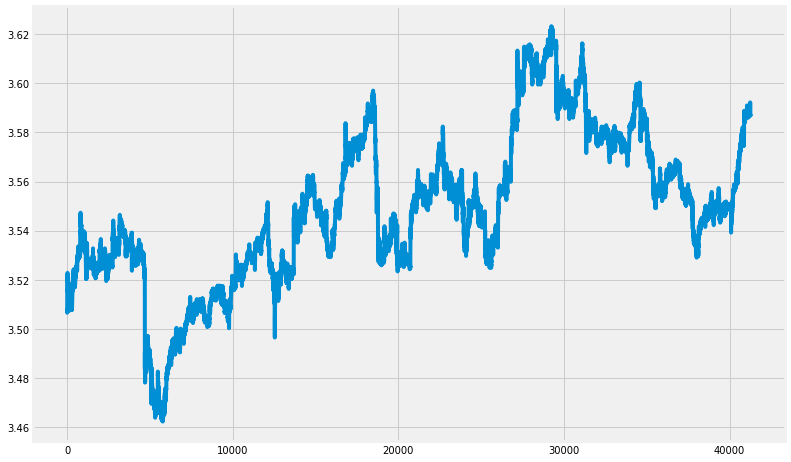

In [9]:
%matplotlib inline
df["EBAY_log"].plot(figsize=(12,8));

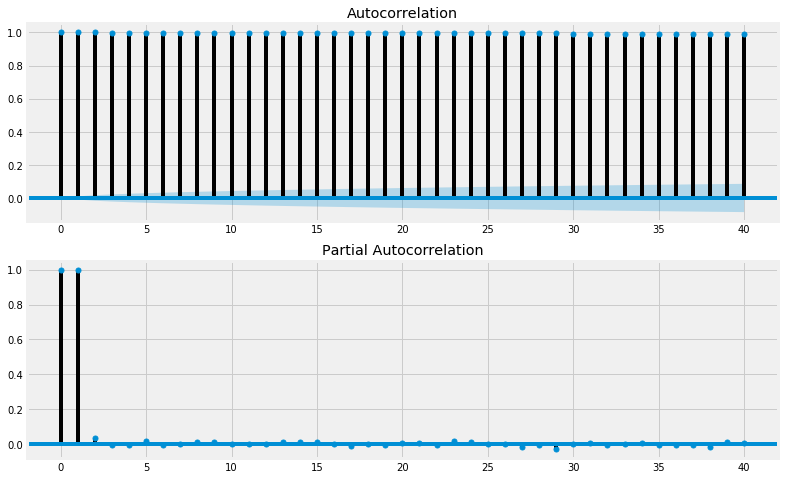

In [10]:
# show plots in the notebook
%matplotlib inline
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df["EBAY_log"].values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df["EBAY_log"], lags=40, ax=ax2)

In [11]:
array = (df["EBAY_log"].dropna().as_matrix())

/home/skull/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [12]:
array

array([3.50848105, 3.50840619, 3.50885526, ..., 3.58712355, 3.58684673,
       3.58712355])

In [13]:
df["difflog_EBAY"] = df["EBAY_log"]-df["EBAY_log"].shift(periods=-1)

In [14]:
model = sm.tsa.ARMA(array, (2,0)).fit()
print(model.params)

[3.54872552 0.95983212 0.03996717]


In [15]:
print(model.aic, model.bic, model.hqic)

-486608.4996382638 -486573.9884614824 -486597.5918569572


In [16]:
#serching for best parameters
aic=999999
b_p,b_d,b_q=0,0,0
for p in range(3):
    for d in range(1,3):
        for q in range(3):
            try:
                model= ARIMA(array,(p,d,q)).fit()
                if(aic > model.aic):
                    aic= model.aic
                    b_p,b_d,b_q=p,d,q
            except:
                pass
                
print(b_p,b_d,b_q)

/home/skull/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/home/skull/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/skull/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/skull/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/home/skull/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_ret

1 1 0


/home/skull/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


In [17]:
 model= ARIMA(array,(1,1,0)).fit()

In [18]:
sm.stats.durbin_watson(model.resid)

1.9994925974658417

In [19]:
pred=model.predict()
pred

array([ 1.90559301e-06,  4.98257795e-06, -1.60182678e-05, ...,
        7.52871946e-06,  1.98197592e-06,  1.30777662e-05])

In [21]:
from sklearn.metrics import mean_squared_error
print(np.sqrt(mean_squared_error(pred,df["difflog_EBAY"][:-1])))

0.0006675727484706809
